https://github.com/JankaMarschalkova/python-podzim-pondeli-2023/blob/main/ukoly/ukol-10.md

### Zadání

Stáhni si soubor platy_2021_02.csv s informacemi o platech v softwarové firmě.

Načti si data do tabulky a vytvoř histogram. Nastav vhodně hranice skupin histogramu (parametr bins), aby byl graf přehledný a snadno interpretovatelný.

        Import knihoven Pandas, Matplotlib a Pytemperature (pro převod teplot v bonusovém cvičení)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import pytemperature

        Načtení dat

In [58]:
platy = pd.read_csv("platy_2021_02.csv")
platy.head()


,cislo_zamestnance,plat
0,3,54900.0
1,6,54800.0
2,7,36400.0
3,8,47900.0
4,16,34200.0


        Vytvoření histogramu

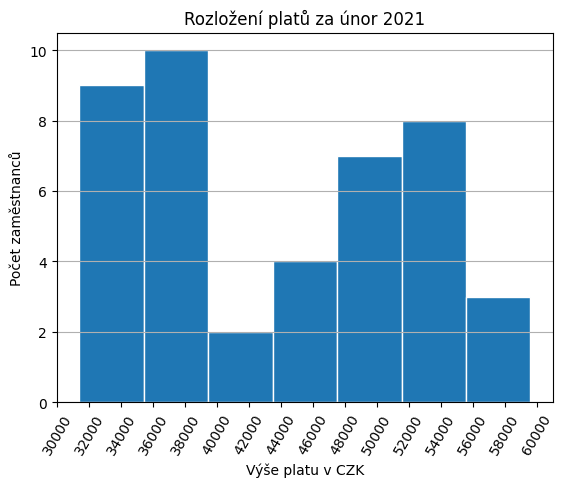

In [59]:
platy["plat"].hist(bins=7, edgecolor="white")
# omezení mřířky na osu y
plt.grid(axis='x')
# přidání nazvu osy x a y
plt.xlabel("Výše platu v CZK")
plt.ylabel("Počet zaměstnanců")
# nastavení nadpisu
plt.title("Rozložení platů za únor 2021")
# úprava počtu značek osy x
plt.xticks(range(30000, 61000, 2000))
# nastavení značek osy x
plt.tick_params(axis="x", labelrotation=60) 

plt.show()

### Bonus 1

Vrať se k práci se souborem temperature.csv, který obsahuje informace o průměrné teplotě v různých městech v listopadu 2017.

        Načtení dat

In [60]:
teploty = pd.read_csv("temperature.csv")
teploty.head()

,Region,Country,City,Day,AvgTemperature
0,Africa,Algeria,Algiers,1,62.0
1,Africa,Algeria,Algiers,2,62.2
2,Africa,Algeria,Algiers,3,65.7
3,Africa,Algeria,Algiers,4,69.8
4,Africa,Algeria,Algiers,5,63.8


1. Vytvoř tabulku, která bude obsahovat údaje o teplotě za města Helsinki, Miami Beach a Tokyo.

        Vytvoření tabulky s teplotami v Helsinkach

In [61]:
helsinki = teploty[teploty["City"].isin(["Helsinki"])][["AvgTemperature", "Day"]].set_index("Day")
helsinki = helsinki.rename(columns={"AvgTemperature": "Helsinki"})
helsinki.head()

,Helsinki
Day,
1,29.6
2,29.5
3,35.1
4,44.5
5,45.5


        Vytvoření tabulky s teplotami v Miami Beach

In [62]:
miami = teploty[teploty["City"].isin(["Miami Beach"])][["AvgTemperature", "Day"]].set_index("Day")
miami = miami.rename(columns={"AvgTemperature": "Miami Beach"})
miami.head()

,Miami Beach
Day,
1,74.6
2,76.8
3,77.4
4,77.4
5,77.2


        Vytvoření tabulky s teplotami v Tokiu

In [63]:
tokyo = teploty[teploty["City"].isin(["Tokyo"])][["AvgTemperature", "Day"]].set_index("Day")
tokyo = tokyo.rename(columns={"AvgTemperature": "Tokyo"})
tokyo.head()

,Tokyo
Day,
1,59.1
2,62.3
3,64.1
4,59.6
5,57.0


        Propojení tabulek do jedne tabulky s teplotami ze tři měst

In [64]:
helsinki_miami = pd.merge(helsinki, miami, on="Day")
helsinki_miami_tokyo = pd.merge(helsinki_miami, tokyo, on="Day")
helsinki_miami_tokyo.head()

,Helsinki,Miami Beach,Tokyo
Day,,,
1,29.6,74.6,59.1
2,29.5,76.8,62.3
3,35.1,77.4,64.1
4,44.5,77.4,59.6
5,45.5,77.2,57.0


        Převedení teplot na stupně Celsia 

In [65]:
helsinki_miami_tokyo["Helsinki"] = pytemperature.f2c(helsinki_miami_tokyo["Helsinki"])
helsinki_miami_tokyo["Miami Beach"] = pytemperature.f2c(helsinki_miami_tokyo["Miami Beach"])
helsinki_miami_tokyo["Tokyo"] = pytemperature.f2c(helsinki_miami_tokyo["Tokyo"])
helsinki_miami_tokyo.head()

,Helsinki,Miami Beach,Tokyo
Day,,,
1,-1.33,23.67,15.06
2,-1.39,24.89,16.83
3,1.72,25.22,17.83
4,6.94,25.22,15.33
5,7.50,25.11,13.89


2. Vytvoř krabicový graf a porovnej rozsah teplot v těchto městech.

        Vytvoření krabicového grafu znázorňujícího rozsah teplot ve výbraných městech

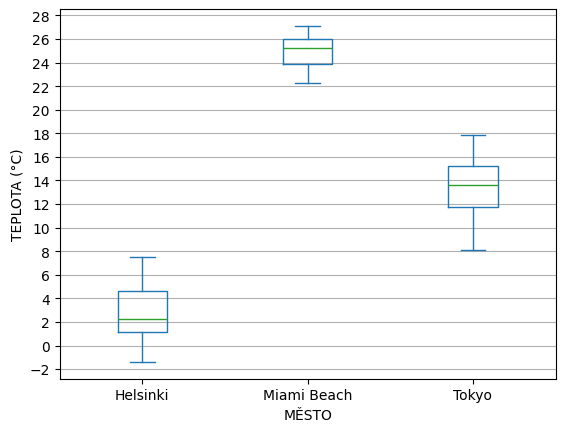

In [66]:
helsinki_miami_tokyo.plot(
    kind="box",
    whis=[
        0,
        100,
    ],
    ylabel="TEPLOTA (°C)",
    xlabel="MĚSTO",
    # úprava počtu značek osy x
    yticks=range(-2, 30, 2)
)

# omezení mřířky na osu y
plt.grid(axis="y")
plt.show()

        Porovnání rozsahu teplot ve městech

In [67]:
print("Helsinki a Tokio mají podobný rozsah teplot - cca 10 stupňů Celsia, zatímco Miami Beach jen kolem 5 stupňů Celsia.")

Helsinki a Tokio mají podobný rozsah teplot - cca 10 stupňů Celsia, zatímco Miami Beach jen kolem 5 stupňů Celsia.
